# TRABALHO PRÁTICO 1: PREVISÃO SALARIAL - KNN vs ÁRVORE DE DECISÃO 

##### Este conjunto de dados contém informações sobre os salários dos funcionários de uma empresa. Cada linha representa um funcionário diferente, e as colunas incluem informações como idade, gênero, nível de educação, cargo, anos de experiência e salário.

### Colunas:

- Idade: Esta coluna representa a idade de cada funcionário em anos. Os valores nesta coluna são numéricos.

- Gênero: Esta coluna contém o gênero de cada funcionário, que pode ser masculino ou feminino. Os valores nesta coluna são categóricos.

- Nível de Educação: Esta coluna contém o nível educacional de cada funcionário, que pode ser ensino médio, graduação, mestrado ou doutorado. Os valores nesta coluna são categóricos.

- Cargo: Esta coluna contém o cargo de cada funcionário. Os cargos podem variar dependendo da empresa e podem incluir posições como gerente, analista, engenheiro ou administrador. Os valores nesta coluna são categóricos.

- Anos de Experiência: Esta coluna representa o número de anos de experiência de trabalho de cada funcionário. Os valores nesta coluna são numéricos.

- Salário: Esta coluna representa o salário anual de cada funcionário em dólares americanos. Os valores nesta coluna são numéricos e podem variar dependendo de fatores como cargo, anos de experiência e nível de educação.

### Bibliotecas necessárias

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Informações do Dataset

- **count**: Total de valores disponíveis para cada variável.
- **mean**: Média dos valores.
- **std**: Desvio padrão, ou seja, o quanto os valores variam em relação à média. 
- **min**: Menor valor observado.
- **25% (1º quartil)**: 25% dos valores estão abaixo desse ponto. 
- **50% (mediana)**: Valor central que divide os dados em duas partes iguais.
- **75% (3º quartil)**: 75% dos valores estão abaixo desse ponto.
- **max**: Maior valor observado.

In [67]:
ds = pd.read_csv("./Salary Data.csv")

print("Estatísticas descritivas do dataset:")
print(ds.describe())
print("\nDados ausentes por coluna:")
print(ds.isnull().sum())

Estatísticas descritivas do dataset:
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000

Dados ausentes por coluna:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### Tratamento dos dados

Como podemos ver no arquivo ```Salary Data.csv``` as colunas **Gender**, **Education Level** e **Job Title** precisam ser tratadas pois são `strings`

In [ ]:
ds['Gender'] = LabelEncoder().fit_transform(ds['Gender']) 
ds['Education Level'] = LabelEncoder().fit_transform(ds['Education Level'])
ds['Job Title'] = LabelEncoder().fit_transform(ds['Job Title'])


AttributeError: 'DataFrame' object has no attribute 'normalize'

### Vendo a correlação dos dados

Criando um Heatmap com os dados para ver quais deles estão mais correlacionados uns comos outros.

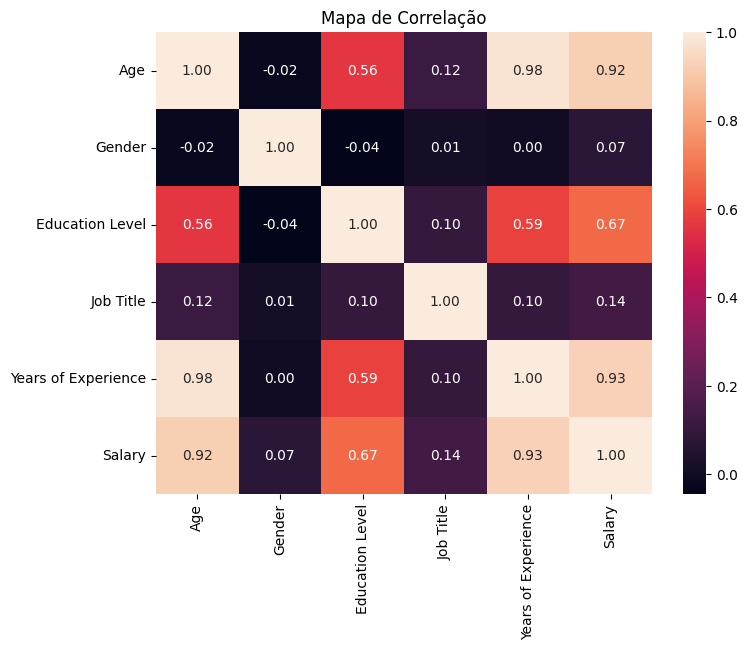

In [70]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(ds.corr(), annot=True, fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

### Separando varáveis independentes e dependentes

As variáveis de **Age**, **Gender**, **Education Level**, **Job Title**, **Years of Experience** serão usadas como `X` (entrada) já **Salary** será a saída esperada `Y`.

Além disso com o uso do método `trains_test_split()` iremos separa o conjunto de dados de forma aleatória para o treino e teste.

In [61]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

# Fazendo a normalização das variaveis independentes
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


### Instânciando e Treinando os modelos

1. **K-Nearest Neighbors (KNN):** Algoritmo baseado em proximidade entre os pontos.
2. **Árvore de Decisão:** Algoritmo baseado em divisão recursiva do espaço dos dados.

In [82]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

decision_tree = DecisionTreeRegressor(criterion='friedman_mse')
decision_tree.fit(X_train, y_train)



DecisionTreeRegressor(criterion='friedman_mse')

### Fazendo a predição e avaliação dos modelos

Os modelos serão avaliados utilizando as métricas:
- **R² (Coeficiente de Determinação):** Mede a proporção da variabilidade explicada pelo modelo, similar ao score.
- **Erro Médio Absoluto (MAE):** Média dos erros absolutos.
- **Erro Quadrático Médio (MSE):** Penaliza erros maiores de forma mais significativa.


In [83]:
knn_predictions = knn.predict(X_test)

print(f"\nDesempenho do KNN:")
print(f"R²/Score: {r2_score(y_test, knn_predictions):.2f}")
print(f"MAE: {mean_absolute_error(y_test, knn_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, knn_predictions):.2f}")


decision_tree_predictions = decision_tree.predict(X_test)

print(f"\nDesempenho da Árvore de Decisão:")
print(f"R²/Score: {r2_score(y_test, decision_tree_predictions):.2f}")
print(f"MAE: {mean_absolute_error(y_test, decision_tree_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, decision_tree_predictions):.2f}")


Desempenho do KNN:
R²/Score: 0.92
MAE: 9142.23
MSE: 176887900.89

Desempenho da Árvore de Decisão:
R²/Score: 0.88
MAE: 10645.76
MSE: 270521478.79


### Comparação gráfica

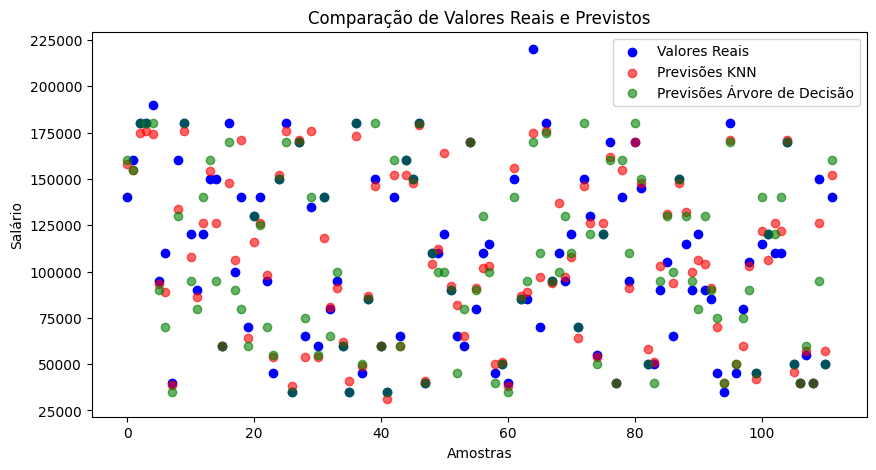

In [55]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reais')
plt.scatter(range(len(knn_predictions)), knn_predictions, color='red', label='Previsões KNN', alpha=0.6)
plt.scatter(range(len(decision_tree_predictions)), decision_tree_predictions, color='green', label='Previsões Árvore de Decisão', alpha=0.6)
plt.title("Comparação de Valores Reais e Previstos")
plt.xlabel("Amostras")
plt.ylabel("Salário")
plt.legend()
plt.show()

### Conclusão Geral

O KNN demonstrou um desempenho melhor em todas as métricas, com um R² mais alto (0.92) e menores erros (MAE e MSE) em comparação à Árvore de Decisão.
A Árvore de Decisão teve um desempenho razoável, mas apresentou um maior erro médio e uma explicação menor da variabilidade dos dados (R² de 0.86).
Portanto, para esse conjunto de dados, o KNN seria o modelo mais eficiente em termos de precisão e capacidade de previsão.